In [207]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'frozen_set'

In [228]:
opioids = pd.read_csv("./data/opioids.csv")
deaths = pd.read_csv("./data/overdoses.csv")
prescribers = pd.read_csv("./data/prescriber-info.csv")
deaths["Deaths"] = deaths["Deaths"].apply(lambda x: int(x.replace(",","")))
deaths["Population"] = deaths["Population"].apply(lambda x: int(x.replace(",","")))
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY', 'DC']

prescribers = prescribers[prescribers["State"].isin(states)]

In [229]:
#Get deaths to population
ratio = [deaths.loc[i, "Deaths"] / deaths.loc[i, "Population"] for i in range(50)]
death_to_population_ratio = pd.Series(data = ratio)
deaths["DeathsVsPopulation"] = death_to_population_ratio
deaths

,State,Population,Deaths,Abbrev,DeathsVsPopulation
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118
5,Colorado,5268367,899,CO,0.000171
6,Connecticut,3596080,623,CT,0.000173
7,Delaware,925749,189,DE,0.000204
8,Florida,19552860,2634,FL,0.000135
9,Georgia,9992167,1206,GA,0.000121


In [230]:
prescribers.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [231]:
ops = list(re.sub(r'[-\s]','.',x) for x in opioids.values[:,0])
prescribed_ops = list(set(ops) & set(prescribers.columns))

prescribers['NumOpioids'] = prescribers.apply(lambda x: sum(x[prescribed_ops]),axis=1)
prescribers['NumPrescriptions'] = prescribers.apply(lambda x: sum(x.iloc[5:255]),axis=1)
prescribers['OpiodPrescribedVsPrescriptions'] = prescribers.apply(lambda x: float(x['NumOpioids'])/x['NumPrescriptions'],axis=1)

In [232]:
prescribers.describe()

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,NumOpioids,NumPrescriptions,OpiodPrescribedVsPrescriptions
count,2.475900e+04,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,...,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,1.498190e+09,3.167979,2.361848,1.060261,7.073387,0.710772,8.807100,9.285270,16.081425,2.401713,...,0.789491,19.282645,3.341128,4.054203,1.125207,11.386607,0.587180,86.028757,1371.205865,0.147624
std,2.877324e+08,20.817628,11.577566,6.688559,25.996510,5.243046,36.167449,29.118868,69.449508,14.319252,...,4.809770,86.856730,17.115224,18.469096,10.336975,36.141503,0.492351,283.474471,3097.612693,0.267638
min,1.003002e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,1.245491e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000
50%,1.497837e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,193.000000,0.008919
75%,1.740417e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1143.000000,0.134221
max,1.992999e+09,770.000000,644.000000,356.000000,1105.000000,275.000000,2431.000000,790.000000,5716.000000,596.000000,...,143.000000,6029.000000,596.000000,772.000000,694.000000,1707.000000,1.000000,15234.000000,56280.000000,1.000000


Opioids make up 14.6% of prescriptions
58.7% of doctors have written a prescription for opioids

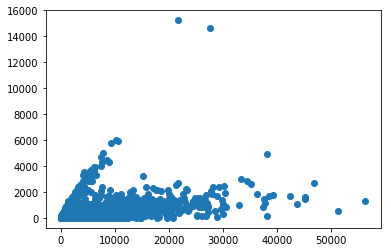

In [234]:
x = prescribers["NumPrescriptions"]
# y = prescribers["OpiodPrescribedVsPrescriptions"]
y = prescribers["NumOpioids"]

plt.scatter(x,y)
plt.show()

Many doctors prescribe a heavy amount of opiates to patients (high ratio)

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,NumOpioids,NumPrescriptions,OpiodPrescribedVsPrescriptions
13299,1043434954,M,KY,D.M.D.,Oral Surgery (dentists only),0,0,0,0,0,...,0,0,0,0,0,0,1,206,206,1.0
11793,1881613537,M,CT,MD,Emergency Medicine,0,0,0,0,0,...,0,0,0,0,0,0,1,21,21,1.0
11849,1649257932,M,NC,M.D.,Emergency Medicine,0,0,0,0,0,...,0,0,0,0,0,0,1,20,20,1.0
11858,1306158035,M,FL,MD,Internal Medicine,0,0,0,0,0,...,0,0,0,0,0,0,1,15,15,1.0
11880,1417928508,M,FL,M.D.,Critical Care (Intensivists),0,0,0,0,0,...,0,0,0,0,0,0,1,13,13,1.0
11889,1598044299,M,CT,NaN,Student in an Organized Health Care Education/...,0,0,0,0,0,...,0,0,0,0,0,0,1,12,12,1.0
11905,1497043186,F,OH,M.D.,Student in an Organized Health Care Education/...,0,0,0,0,0,...,0,0,0,0,0,0,1,11,11,1.0
11937,1770544330,F,PA,PA-C,Physician Assistant,0,0,0,0,0,...,0,0,0,0,0,0,1,12,12,1.0
11975,1982691523,M,PA,MD,Emergency Medicine,0,0,0,0,0,...,0,0,0,0,0,0,1,12,12,1.0
1320,1639327364,M,WA,M.D.,Orthopedic Surgery,0,0,0,0,0,...,0,0,0,0,0,0,1,90,90,1.0


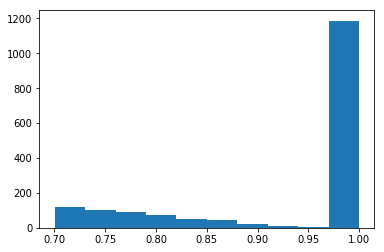

In [236]:
high_prescribers = prescribers["OpiodPrescribedVsPrescriptions"][prescribers["OpiodPrescribedVsPrescriptions"] > .7] 
plt.hist(high_prescribers)
prescribers.sort_values("OpiodPrescribedVsPrescriptions", ascending=False)

In [249]:
num_opioid_prescriptions = prescribers.groupby("State")["NumOpioids"].sum()
opioid_prescribers_by_state = prescribers.groupby("State")["Opioid.Prescriber"].sum()
num_doctors = prescribers.groupby("State")["NPI"].count()
print(prescribers_by_state)
print(opioid_prescribers_by_state)

State
AA       0
AE       2
AK      27
AL     244
AR     159
AZ     331
CA    1462
CO     256
CT     202
DC      35
DE      51
FL     875
GA     398
GU       1
HI      47
IA     120
ID      88
IL     555
IN     324
KS     129
KY     198
LA     224
MA     369
MD     303
ME      94
MI     554
MN     259
MO     288
MS     130
MT      55
NC     498
ND      39
NE      81
NH      72
NJ     344
NM      99
NV     108
NY     875
OH     563
OK     205
OR     220
PA     679
PR     143
RI      74
SC     258
SD      43
TN     358
TX     949
UT     107
VA     342
VI       3
VT      40
WA     365
WI     292
WV     126
WY      24
ZZ       1
Name: Opioid.Prescriber, dtype: int64
State
AK      27
AL     244
AR     159
AZ     331
CA    1462
CO     256
CT     202
DC      35
DE      51
FL     875
GA     398
HI      47
IA     120
ID      88
IL     555
IN     324
KS     129
KY     198
LA     224
MA     369
MD     303
ME      94
MI     554
MN     259
MO     288
MS     130
MT      55
NC     498
ND      39
NE  

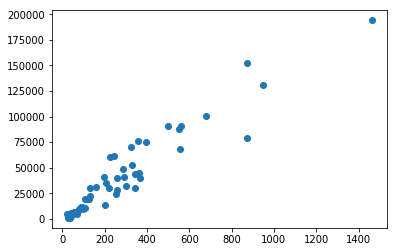

In [250]:
plt.scatter(opioid_prescribers_by_state, num_opioid_prescriptions)

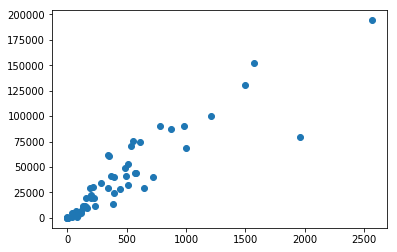

In [172]:
plt.scatter(num_doctors, num_opioid_prescriptions)

In [254]:
with open("out.csv", "w") as f:
    f.write(num_opioid_prescriptions.to_csv())

In [191]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']